In [7]:
pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [8]:
from transformers import pipeline
import pandas as pd

# Sample reviews (Replace with your actual review data)
reviews = [
    "The delivery was late and the package was damaged.",
    "Excellent product! Arrived on time and as expected.",
    "Very disappointed. Never received my item.",
    "Great quality and super fast delivery.",
    "Terrible experience. Will not buy again."
]

# Load the BERT sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Get predictions
results = sentiment_pipeline(reviews)

# Convert results into DataFrame
df = pd.DataFrame({
    'Review': reviews,
    'Label': [res['label'] for res in results],
    'Confidence': [res['score'] for res in results]
})

# Convert star rating to Positive/Neutral/Negative
def map_label(label):
    if "1" in label or "2" in label:
        return "Negative"
    elif "3" in label:
        return "Neutral"
    else:
        return "Positive"

df['Sentiment'] = df['Label'].apply(map_label)

print(df)


Device set to use cuda:0


                                              Review    Label  Confidence  \
0  The delivery was late and the package was dama...   1 star    0.460205   
1  Excellent product! Arrived on time and as expe...  5 stars    0.898792   
2         Very disappointed. Never received my item.   1 star    0.869243   
3             Great quality and super fast delivery.  5 stars    0.886872   
4           Terrible experience. Will not buy again.   1 star    0.838870   

  Sentiment  
0  Negative  
1  Positive  
2  Negative  
3  Positive  
4  Negative  


In [9]:
import pandas as pd

# Load review data
reviews_df = pd.read_csv("/content/olist_order_reviews_dataset.csv", encoding='ISO-8859-1')

# Check sample
reviews_df[['review_id', 'order_id', 'review_score', 'review']].head()


,review_id,order_id,review_score,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,I had an order that was lost in transit. When ...
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,I ordered the wrong size tee and had difficult...
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,These guys offer the best customer service in ...
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Looked for an obscure phrase on a shirt. Teepu...
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,My order arrived in a good timely fashion & th...


In [10]:
reviews_df

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,43118.0,43118.90763,I had an order that was lost in transit. When ...
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,43169.0,43170.12862,I ordered the wrong size tee and had difficult...
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,43148.0,43149.60861,These guys offer the best customer service in ...
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,42846.0,42846.91813,Looked for an obscure phrase on a shirt. Teepu...
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,43160.0,43161.43534,My order arrived in a good timely fashion & th...
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,43288.0,43295.72118,Fabulous. Great service and awesome looking t ...
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,43078.0,43080.83799,I got the Trucker Convoy womens vneck tshirt. ...
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,43181.0,43182.38244,I absolutely love the tiger t-shirt I ordered ...
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,43282.0,43283.54112,"The sizing is pretty true, shipping was very q..."


In [12]:
from transformers import pipeline
import torch

# Load model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Drop missing reviews
reviews_df = reviews_df.dropna(subset=['review'])

# Get a sample (for now, to reduce compute time)
sample_reviews = reviews_df[['review_id','order_id', 'review']]

# Run sentiment
# sample_reviews['bert_sentiment'] = sample_reviews['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
# sample_reviews['confidence'] = sample_reviews['review'].apply(lambda x: sentiment_pipeline(x)[0]['score'])

sample_reviews['bert_sentiment'] = sample_reviews['review'].apply(
    lambda x: sentiment_pipeline(x, truncation=True)[0]['label']
)
sample_reviews['confidence'] = sample_reviews['review'].apply(
    lambda x: sentiment_pipeline(x, truncation=True)[0]['score']
)


# Optional: Map BERT star rating to sentiment
def map_star_to_sentiment(label):
    if '1' in label or '2' in label:
        return 'Negative'
    elif '3' in label:
        return 'Neutral'
    else:
        return 'Positive'

sample_reviews['sentiment'] = sample_reviews['bert_sentiment'].apply(map_star_to_sentiment)

# Final preview
sample_reviews.head()


Device set to use cuda:0
/tmp/ipython-input-12-3150989557.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_reviews['bert_sentiment'] = sample_reviews['review'].apply(
/tmp/ipython-input-12-3150989557.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_reviews['confidence'] = sample_reviews['review'].apply(


,review_id,order_id,review,bert_sentiment,confidence,sentiment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 star,0.463912,Negative
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,These guys offer the best customer service in ...,5 stars,0.931877,Positive
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,Looked for an obscure phrase on a shirt. Teepu...,5 stars,0.730833,Positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,My order arrived in a good timely fashion & th...,5 stars,0.622925,Positive


In [13]:
sample_reviews

,review_id,order_id,review,bert_sentiment,confidence,sentiment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 star,0.463912,Negative
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,These guys offer the best customer service in ...,5 stars,0.931877,Positive
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,Looked for an obscure phrase on a shirt. Teepu...,5 stars,0.730833,Positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,My order arrived in a good timely fashion & th...,5 stars,0.622925,Positive
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,Fabulous. Great service and awesome looking t ...,5 stars,0.951759,Positive
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,I got the Trucker Convoy womens vneck tshirt. ...,3 stars,0.564787,Neutral
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,I absolutely love the tiger t-shirt I ordered ...,5 stars,0.881840,Positive
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,"The sizing is pretty true, shipping was very q...",4 stars,0.477716,Positive


In [16]:
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
orders_df = pd.read_csv("/content/olist_orders_dataset.csv", encoding='ISO-8859-1')

# Merge on 'order_id'
merged_df = pd.merge(sample_reviews, orders_df, on='order_id', how='inner')

# Preview
merged_df[['order_id', 'sentiment', 'bert_sentiment', 'order_delivered_customer_date', 'order_estimated_delivery_date']].head()


,order_id,sentiment,bert_sentiment,order_delivered_customer_date,order_estimated_delivery_date
0,73fc7af87114b39712e6da79b0a377eb,Negative,1 star,2018-01-17 18:42:41,2018-02-02 00:00:00
1,a548910a1c6147796b98fdf73dbeba33,Positive,5 stars,2018-03-09 23:17:20,2018-03-14 00:00:00
2,f9e4b658b201a9f2ecdecbb34bed034b,Positive,5 stars,2018-02-16 17:28:48,2018-03-09 00:00:00
3,658677c97b385a9be170737859d3511b,Positive,5 stars,2017-04-20 09:08:35,2017-05-10 00:00:00
4,8e6bfb81e283fa7e4f11123a3fb894f1,Positive,5 stars,2018-02-28 16:33:35,2018-03-09 00:00:00


In [32]:
merged_df.head()

,review_id,order_id,review,bert_sentiment,confidence,sentiment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,sentiment_binary
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 star,0.463912,Negative,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16.0,0.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,-5.0,1.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,These guys offer the best customer service in ...,5 stars,0.931877,Positive,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,-21.0,1.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,Looked for an obscure phrase on a shirt. Teepu...,5 stars,0.730833,Positive,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,-20.0,1.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,My order arrived in a good timely fashion & th...,5 stars,0.622925,Positive,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,-9.0,1.0


In [18]:
print(orders_df.columns.tolist())


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [134]:
merged_df.to_csv('merged_df.csv', index=False)


In [142]:
from google.colab import files
files.download('merged_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import pandas as pd


In [81]:
merged_df = pd.read_csv("/content/merged_df.csv", encoding='ISO-8859-1')


In [139]:
merged_df.head(1)

,review_id,order_id,review,bert_sentiment,confidence,sentiment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,sentiment_binary,sentiment_score,review_creation_date,review_length,clean_tokens
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 stars,0.463912,Negative,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16.0,0.0,1,1970-01-01 00:00:00.000043118,32,"[order, lost, transit, called, help, customer,..."


In [140]:
orders_df = pd.read_csv("/content/olist_orders_dataset.csv", encoding='ISO-8859-1')

orders_df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [141]:
reviews_df1 = pd.read_csv("/content/olist_order_reviews_dataset.csv", encoding='ISO-8859-1')
reviews_df1.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,43118.0,43118.90763,I had an order that was lost in transit. When ...


In [83]:
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])


In [84]:
merged_df['delivery_delay'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days


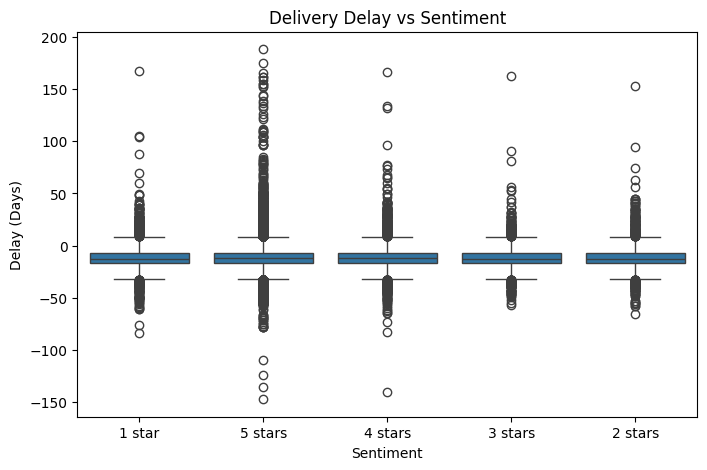

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='bert_sentiment', y='delivery_delay')
plt.title("Delivery Delay vs Sentiment")
plt.ylabel("Delay (Days)")
plt.xlabel("Sentiment")
plt.show()


In [86]:
merged_df['sentiment_binary'] = merged_df['bert_sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

In [87]:
print(merged_df[['delivery_delay', 'sentiment_binary']].isnull().sum())


delivery_delay      2865
sentiment_binary       0
dtype: int64


In [88]:
correlation = clean_corr_df.corr()
print(correlation)

                  delivery_delay  sentiment_binary
delivery_delay               1.0               NaN
sentiment_binary             NaN               NaN


In [89]:
print(merged_df['sentiment_binary'].value_counts())


sentiment_binary
0    99224
Name: count, dtype: int64


In [94]:
print(merged_df['bert_sentiment'].value_counts())


bert_sentiment
5 stars    66692
4 stars    12513
1 star      7637
3 stars     6345
2 stars     6037
Name: count, dtype: int64


In [95]:
print(merged_df[['review', 'bert_sentiment']].sample(10))


                                                  review bert_sentiment
37398  My order arrived quickly and correctly. Shoppi...        5 stars
13523  The first order of t shirts I received were a ...        5 stars
35671          Fast and easy on both buying and delivery        5 stars
6150   One of the shirts I got, the writing looks blu...        3 stars
9749   I had to exchange some tee shirts. It was easy...        3 stars
27712  Quick turnaround time, especially right before...        5 stars
93022  Great quality- fast ship. Love it. 100% cotton...        5 stars
22307     We got exactly what we paid for, good quality.        5 stars
27540                     Awesome work! Loved the shirts        5 stars
22582  Not too impressed at the moment. The order too...        2 stars


In [96]:
def map_star_to_sentiment(star):
    if star in ['5 stars', '4 stars']:
        return 1  # Positive
    elif star in ['1 star', '2 stars']:
        return 0  # Negative
    else:
        return None  # Neutral or unknown

merged_df['sentiment_binary'] = merged_df['bert_sentiment'].apply(map_star_to_sentiment)

# # Drop rows with None (neutral)
# merged_df = merged_df.dropna(subset=['sentiment_binary'])


In [97]:
correlation = merged_df[['delivery_delay', 'sentiment_binary']].corr()
print(correlation)


                  delivery_delay  sentiment_binary
delivery_delay          1.000000          0.001434
sentiment_binary        0.001434          1.000000


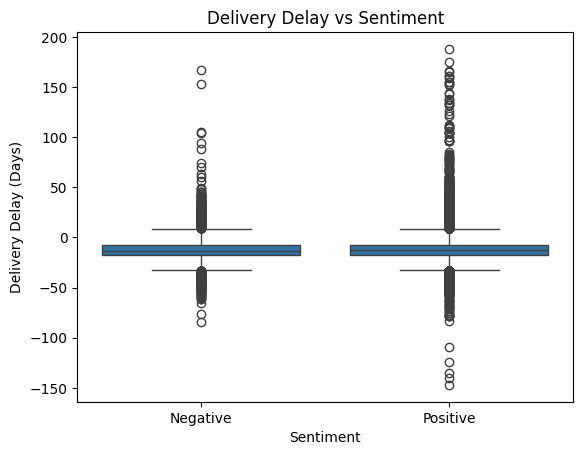

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='sentiment_binary', y='delivery_delay')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Delivery Delay vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Delivery Delay (Days)")
plt.show()



In [99]:
print(merged_df['sentiment_binary'].value_counts())


sentiment_binary
1.0    79205
0.0    13674
Name: count, dtype: int64


In [100]:
merged_df

,review_id,order_id,review,bert_sentiment,confidence,sentiment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,sentiment_binary
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 star,0.463912,Negative,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16.0,0.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,-5.0,1.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,These guys offer the best customer service in ...,5 stars,0.931877,Positive,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,-21.0,1.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,Looked for an obscure phrase on a shirt. Teepu...,5 stars,0.730833,Positive,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,-20.0,1.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,My order arrived in a good timely fashion & th...,5 stars,0.622925,Positive,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,-9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,Fabulous. Great service and awesome looking t ...,5 stars,0.951759,Positive,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,-14.0,1.0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,I got the Trucker Convoy womens vneck tshirt. ...,3 stars,0.564787,Neutral,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,-12.0,NaN
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,I absolutely love the tiger t-shirt I ordered ...,5 stars,0.881840,Positive,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,-16.0,1.0
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,"The sizing is pretty true, shipping was very q...",4 stars,0.477716,Positive,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,-16.0,1.0


In [102]:

# merged_df = merged_df.drop('sentiment_category', axis=1)


In [108]:
##############################
sentiment_distribution = merged_df['sentiment'].value_counts(normalize=True) *100

print("Sentiment Distribution (%):")
print(sentiment_distribution.round(2))


Sentiment Distribution (%):
sentiment
Positive    79.82
Negative    13.78
Neutral      6.39
Name: proportion, dtype: float64


In [104]:
print(merged_df['bert_sentiment'].value_counts())


bert_sentiment
5 stars    66692
4 stars    12513
1 star      7637
3 stars     6345
2 stars     6037
Name: count, dtype: int64


In [105]:
merged_df['bert_sentiment'] = merged_df['bert_sentiment'].replace('1 star', '1 stars')


In [106]:
print(merged_df['bert_sentiment'].value_counts())


bert_sentiment
5 stars    66692
4 stars    12513
1 stars     7637
3 stars     6345
2 stars     6037
Name: count, dtype: int64


In [109]:

# Convert bert_sentiment to numeric score
def star_to_number(star):
    return int(star.split()[0])  # '5 stars' → 5

merged_df['sentiment_score'] = merged_df['bert_sentiment'].apply(star_to_number)

# Calculate average
average_score = merged_df['sentiment_score'].mean()
print(f"\nAverage Sentiment Score: {average_score:.2f}")



Average Sentiment Score: 4.26


/tmp/ipython-input-112-1914991387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


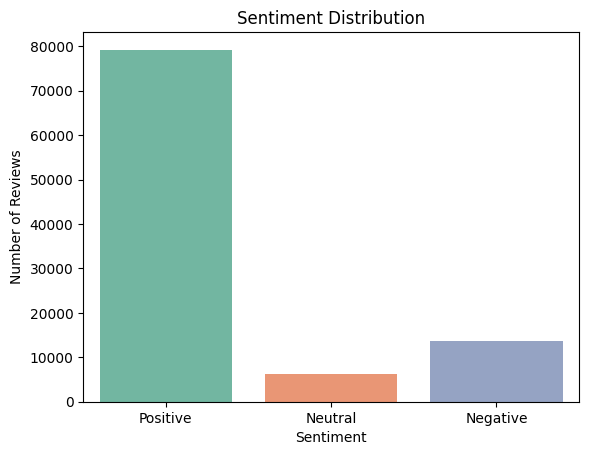

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=merged_df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()


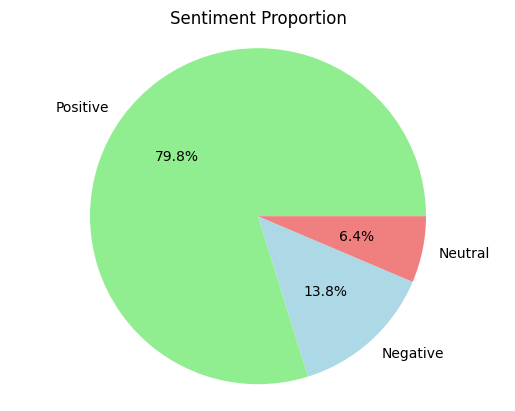

In [114]:
sentiment_counts = merged_df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Sentiment Proportion')
plt.axis('equal')
plt.show()


In [116]:
review_df = pd.read_csv("/content/olist_order_reviews_dataset.csv", encoding='ISO-8859-1')


In [117]:
review_df = review_df[['review_id', 'review_creation_date']]


In [118]:
merged_df = pd.merge(merged_df, review_df, on='review_id', how='left')


In [119]:
merged_df['review_creation_date'] = pd.to_datetime(merged_df['review_creation_date'])


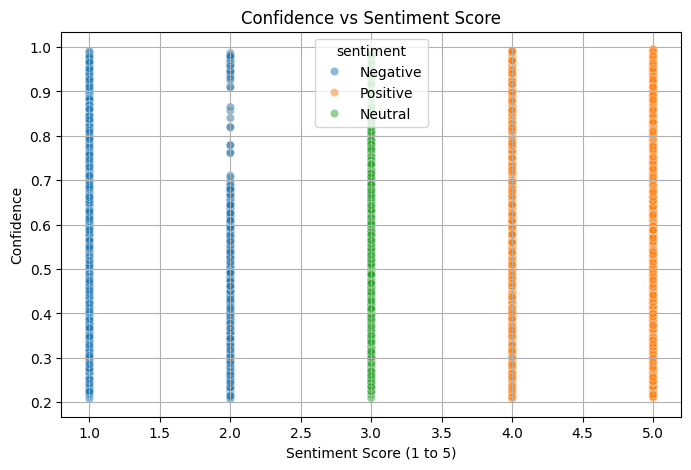

In [124]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='sentiment_score', y='confidence', hue='sentiment', alpha=0.5)
plt.title('Confidence vs Sentiment Score')
plt.xlabel('Sentiment Score (1 to 5)')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


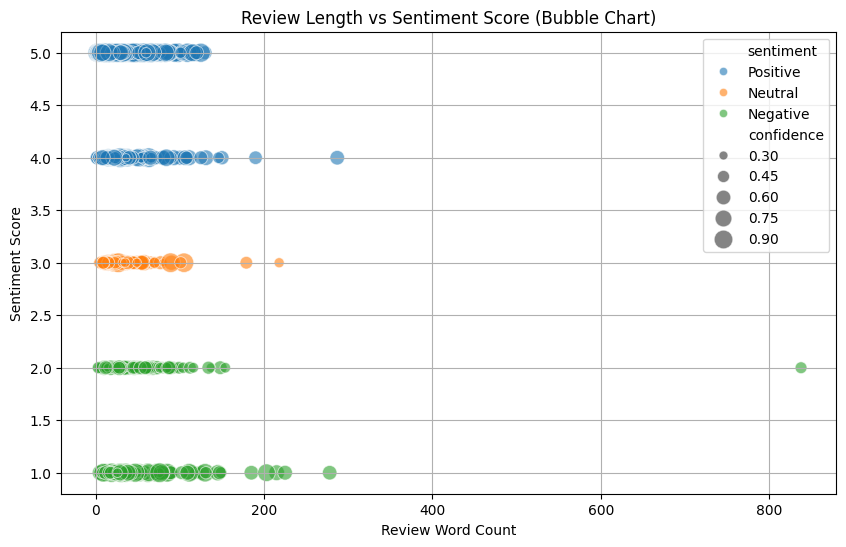

In [125]:
merged_df['review_length'] = merged_df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df.sample(3000),  # sample for clarity
    x='review_length', y='sentiment_score',
    size='confidence', hue='sentiment',
    sizes=(20, 200), alpha=0.6
)
plt.title('Review Length vs Sentiment Score (Bubble Chart)')
plt.xlabel('Review Word Count')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


In [126]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

merged_df['clean_tokens'] = merged_df['review'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [127]:
def get_ngrams(token_lists, n=2):
    ngram_counts = Counter()
    for tokens in token_lists:
        ngram_counts.update(ngrams(tokens, n))
    return ngram_counts


In [128]:
# Split into Positive & Negative reviews
positive_tokens = merged_df[merged_df['sentiment_binary'] == 1]['clean_tokens'].tolist()
negative_tokens = merged_df[merged_df['sentiment_binary'] == 0]['clean_tokens'].tolist()

# Get bigrams and trigrams
pos_bigrams = get_ngrams(positive_tokens, n=2).most_common(15)
neg_bigrams = get_ngrams(negative_tokens, n=2).most_common(15)

pos_trigrams = get_ngrams(positive_tokens, n=3).most_common(15)
neg_trigrams = get_ngrams(negative_tokens, n=3).most_common(15)


In [129]:
print("Top Positive Bigrams:")
for bigram, freq in pos_bigrams:
    print(f"{' '.join(bigram)}: {freq}")

print("\nTop Negative Bigrams:")
for bigram, freq in neg_bigrams:
    print(f"{' '.join(bigram)}: {freq}")


Top Positive Bigrams:
customer service: 7689
good quality: 4699
great quality: 4295
fast shipping: 2676
quality shirts: 1758
great customer: 1721
tee public: 1680
fast delivery: 1615
great service: 1411
great product: 1298
high quality: 1263
quality shirt: 1243
arrived quickly: 1216
timely manner: 1173
love shirts: 1171

Top Negative Bigrams:
customer service: 1288
wrong size: 409
poor quality: 359
tee shirt: 331
looks like: 288
shirt ordered: 287
tee public: 256
ordered 2: 245
never received: 238
ordered shirt: 231
ordered two: 219
way small: 218
ordered wrong: 205
quality shirt: 199
two shirts: 194


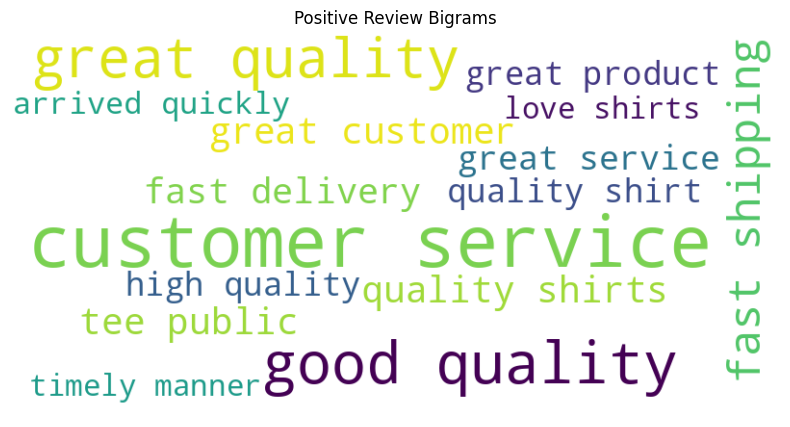

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(ngram_counts, title):
    text = {' '.join(k): v for k, v in ngram_counts}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(pos_bigrams, "Positive Review Bigrams")


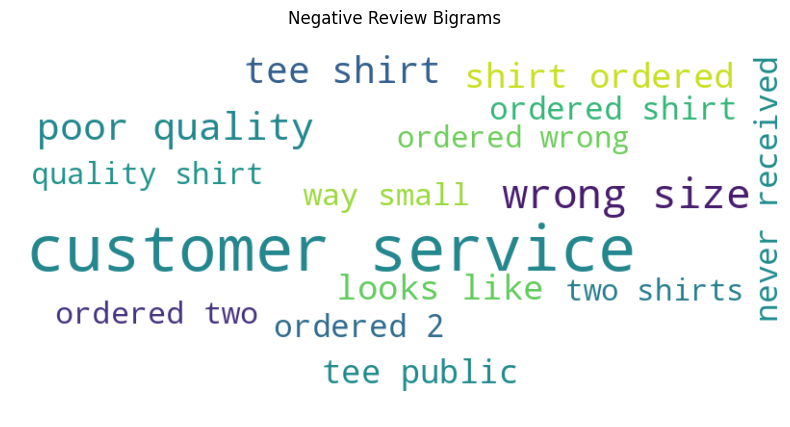

In [133]:
generate_wordcloud(neg_bigrams, "Negative Review Bigrams")